### Multiclass classifier
Classify articles from a Reuters dataset having 46 different categories

### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import models, layers, optimizers, losses, metrics
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical

### Get datasets

In [2]:
LIMIT_WORD = 10000

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=LIMIT_WORD)

C:\Users\Aishwarya\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Aishwarya\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


### Data exploring (convert sequences to original review)

In [3]:
def convert_to_english(sequence):
    word_index = reuters.get_word_index()
    reverse_word_index = dict(
        [(value, key) for (key, value) in word_index.items()]
    )
    decoded_review = " ".join(
        [reverse_word_index.get(i - 3, '?') for i in sequence]
    )
    
    return decoded_review

In [4]:
print(convert_to_english(train_data[0]))

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


### Pre-process the data (convert sequences into tensors)

In [5]:
def vectorize_sequences(sequences, dimension=LIMIT_WORD):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    
    return results

#### Vectorize examples

In [6]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

#### One-hot encoding of labels (categorical encoding)

In [8]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [9]:
one_hot_train_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

#### Building the network
Architecture :-

2 intermediate Dense layers with 16 hidden unites per each (relu actovation function)
1 output layer (with sigmoid activation function)

In [10]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(LIMIT_WORD,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Compile
Loss function: binary crossentropy Optimizer: rmsprop

In [12]:
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss=losses.categorical_crossentropy,
    metrics=[metrics.categorical_accuracy]
)

### Training
1. Define validation data
2. Define epochs and batch size
3. Fit the model

In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
16/16 [==============================] - 1s 41ms/step - loss: 2.5260 - categorical_accuracy: 0.5366 - val_loss: 1.6539 - val_categorical_accuracy: 0.6530
Epoch 2/20
16/16 [==============================] - 0s 21ms/step - loss: 1.3513 - categorical_accuracy: 0.7165 - val_loss: 1.2544 - val_categorical_accuracy: 0.7230
Epoch 3/20
16/16 [==============================] - 0s 21ms/step - loss: 1.0118 - categorical_accuracy: 0.7880 - val_loss: 1.0976 - val_categorical_accuracy: 0.7660
Epoch 4/20
16/16 [==============================] - 0s 24ms/step - loss: 0.7965 - categorical_accuracy: 0.8368 - val_loss: 1.0086 - val_categorical_accuracy: 0.7950
Epoch 5/20
16/16 [==============================] - 1s 42ms/step - loss: 0.6324 - categorical_accuracy: 0.8716 - val_loss: 0.9313 - val_categorical_accuracy: 0.8100
Epoch 6/20
16/16 [==============================] - 1s 50ms/step - loss: 0.5049 - categorical_accuracy: 0.8956 - val_loss: 0.8965 - val_categorical_accuracy: 0.8140
Epoch 7/20

### Plot results
#### Training and validation loss

<function matplotlib.pyplot.show(close=None, block=None)>

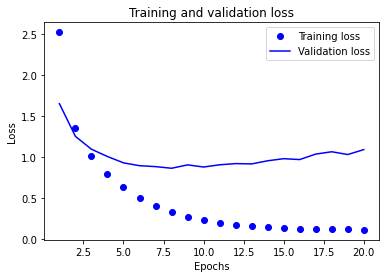

In [16]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['categorical_accuracy']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

In [17]:
history_dict.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

#### Training and validation accuracy

<function matplotlib.pyplot.show(close=None, block=None)>

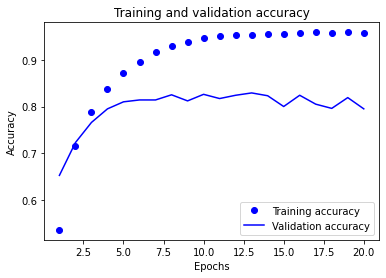

In [19]:
plt.clf()

acc_values = history_dict['categorical_accuracy']
val_acc_values = history_dict['val_categorical_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show

In [20]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(LIMIT_WORD,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(
    optimizer=optimizers.RMSprop(lr=0.001),
    loss=losses.categorical_crossentropy,
    metrics=[metrics.categorical_accuracy]
)
model.fit(
    partial_x_train,
    partial_y_train,
    epochs=10,
    batch_size=512,
    validation_data=(x_val, y_val)
)
results = model.evaluate(x_test, one_hot_test_labels)

C:\Users\Aishwarya\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/10
16/16 [==============================] - 1s 34ms/step - loss: 2.5690 - categorical_accuracy: 0.5140 - val_loss: 1.6982 - val_categorical_accuracy: 0.6440
Epoch 2/10
16/16 [==============================] - 0s 25ms/step - loss: 1.4042 - categorical_accuracy: 0.7129 - val_loss: 1.2946 - val_categorical_accuracy: 0.7150
Epoch 3/10
16/16 [==============================] - 0s 23ms/step - loss: 1.0397 - categorical_accuracy: 0.7835 - val_loss: 1.1122 - val_categorical_accuracy: 0.7680
Epoch 4/10
16/16 [==============================] - 0s 25ms/step - loss: 0.8101 - categorical_accuracy: 0.8302 - val_loss: 1.0261 - val_categorical_accuracy: 0.7810
Epoch 5/10
16/16 [==============================] - 0s 20ms/step - loss: 0.6403 - categorical_accuracy: 0.8653 - val_loss: 0.9745 - val_categorical_accuracy: 0.7890
Epoch 6/10
16/16 [==============================] - 0s 22ms/step - loss: 0.5085 - categorical_accuracy: 0.8950 - val_loss: 0.9295 - val_categorical_accuracy: 0.8010
Epoch 7/10

In [21]:
print(results)

[1.0783836841583252, 0.7742653489112854]


In [22]:
model.predict(x_test)

array([[1.0035299e-06, 1.1242974e-05, 6.1033523e-07, ..., 7.1922472e-07,
        4.0515060e-06, 5.0891549e-07],
       [3.1335923e-04, 2.7163830e-01, 1.4161074e-03, ..., 8.4842235e-05,
        2.1125064e-05, 1.9890334e-05],
       [6.4644619e-04, 8.5418147e-01, 1.7680736e-03, ..., 3.2651972e-04,
        2.4325290e-04, 3.5262987e-05],
       ...,
       [1.9058061e-06, 1.0357866e-04, 1.3296561e-05, ..., 9.1242409e-06,
        1.3221905e-05, 5.1894681e-06],
       [1.8985444e-03, 4.0285580e-02, 2.7862464e-03, ..., 1.9871818e-03,
        2.4424170e-03, 9.8041410e-04],
       [1.6295681e-04, 7.9001379e-01, 7.6177777e-03, ..., 6.9700982e-05,
        1.6085738e-04, 2.2389015e-05]], dtype=float32)